<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

In [1]:
!pip install plotly

  Using cached plotly-5.5.0-py2.py3-none-any.whl (26.5 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [2]:
import pandas as  pd
import datetime as dt
from datetime import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"

In [3]:
pwd

'/home/jovyan/FULL/PROJECTS certification/3_uber_pickups'

In [4]:
# frames = [df1, df2, df3]
# result = pd.concat(frames)

df_1404 = pd.read_csv("/home/jovyan/FULL/6_UNSUPERVISED_Machine_Learning/7_PROJECTS_Unsupervised_Machine_Learning/uber_src/uber-raw-data-apr14.csv")
df_1405 = pd.read_csv("/home/jovyan/FULL/6_UNSUPERVISED_Machine_Learning/7_PROJECTS_Unsupervised_Machine_Learning/uber_src/uber-raw-data-may14.csv")
df_1406 = pd.read_csv("/home/jovyan/FULL/6_UNSUPERVISED_Machine_Learning/7_PROJECTS_Unsupervised_Machine_Learning/uber_src/uber-raw-data-jun14.csv")
df_1407 = pd.read_csv("/home/jovyan/FULL/6_UNSUPERVISED_Machine_Learning/7_PROJECTS_Unsupervised_Machine_Learning/uber_src/uber-raw-data-jul14.csv")
df_1408 = pd.read_csv("/home/jovyan/FULL/6_UNSUPERVISED_Machine_Learning/7_PROJECTS_Unsupervised_Machine_Learning/uber_src/uber-raw-data-aug14.csv")
df_1409 = pd.read_csv("/home/jovyan/FULL/6_UNSUPERVISED_Machine_Learning/7_PROJECTS_Unsupervised_Machine_Learning/uber_src/uber-raw-data-sep14.csv")
df_15 = pd.read_csv("/home/jovyan/FULL/6_UNSUPERVISED_Machine_Learning/7_PROJECTS_Unsupervised_Machine_Learning/uber_src/uber-raw-data-janjune-15.csv")
df_taxizone = pd.read_csv("/home/jovyan/FULL/6_UNSUPERVISED_Machine_Learning/7_PROJECTS_Unsupervised_Machine_Learning/uber_src/taxi-zone-lookup.csv")


## DF_taxizone description

In [5]:
df_taxizone.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


In [6]:
df_taxizone.shape

(265, 3)

In [7]:
df_taxizone.value_counts()

LocationID  Borough    Zone                     
265         Unknown    Unknown                      1
83          Queens     Elmhurst/Maspeth             1
97          Brooklyn   Fort Greene                  1
96          Queens     Forest Park/Highland Park    1
95          Queens     Forest Hills                 1
                                                   ..
171         Queens     Murray Hill-Queens           1
170         Manhattan  Murray Hill                  1
169         Bronx      Mount Hope                   1
168         Bronx      Mott Haven/Port Morris       1
1           EWR        Newark Airport               1
Length: 265, dtype: int64


## DF_15 description


In [8]:
df_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [9]:
df_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [10]:
df_15.shape

(14270479, 4)

In [11]:
df_15.isna().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
dtype: int64

In [12]:
df_15.describe(include="all")

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
count,14270479,14270479,14108284,1.427048e+07
unique,8,2744783,284,NaN
top,B02764,2015-06-27 20:52:00,B02764,NaN
freq,5753653,213,4352321,NaN
mean,NaN,NaN,NaN,1.520574e+02
std,NaN,NaN,NaN,7.159620e+01
min,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,9.200000e+01
50%,NaN,NaN,NaN,1.570000e+02
75%,NaN,NaN,NaN,2.300000e+02


In [13]:
df_15["Pickup_date"] = pd.to_datetime(df_15["Pickup_date"])

In [14]:
df_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

## DF_14 description

In [15]:
df_1409.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [16]:
dfs = [df_1404, df_1405, df_1406, df_1407, df_1408, df_1409]

df_14 = pd.concat(dfs)

In [17]:
df_14.shape

(4534327, 4)

In [18]:
df_14.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [19]:
df_14.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [20]:
df_14["Date/Time"] = pd.to_datetime(df_14["Date/Time"])

In [21]:
df_14.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [22]:
df_14["Date/Time"].loc[0]

0   2014-04-01 00:11:00
0   2014-05-01 00:02:00
0   2014-06-01 00:00:00
0   2014-07-01 00:03:00
0   2014-08-01 00:03:00
0   2014-09-01 00:01:00
Name: Date/Time, dtype: datetime64[ns]

In [23]:
df_15["Pickup_date"].value_counts()

2015-06-27 20:52:00    213
2015-06-27 22:19:00    213
2015-06-27 21:36:00    210
2015-06-27 22:14:00    207
2015-06-27 19:43:00    204
                      ... 
2015-02-11 23:49:03      1
2015-02-05 20:00:10      1
2015-01-30 22:18:22      1
2015-01-30 11:20:25      1
2015-01-11 22:52:51      1
Name: Pickup_date, Length: 2744783, dtype: int64

In [24]:
df_15["date"] = df_15["Pickup_date"].dt.date
df_15["hour"] = df_15["Pickup_date"].dt.time
df_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date,hour
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17,09:47:00
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17,09:47:00
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17,09:47:00
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17,09:47:00
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17,09:47:00
...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015-05-08,15:43:00
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015-05-08,15:43:00
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015-05-08,15:43:00
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08,15:44:00


## Date selection

In [25]:
df_15["date"] = pd.to_datetime(df_15["date"]) # converrting to be able to select specific date and match project advise selecting 1 specific before extrapolating

In [26]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Dispatching_base_num  object        
 1   Pickup_date           datetime64[ns]
 2   Affiliated_base_num   object        
 3   locationID            int64         
 4   date                  datetime64[ns]
 5   hour                  object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 653.3+ MB


In [27]:
df_15[df_15["date"]=="2015-05-17"]

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date,hour
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17,09:47:00
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17,09:47:00
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17,09:47:00
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17,09:47:00
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17,09:47:00
...,...,...,...,...,...,...
12501259,B02765,2015-05-17 19:46:00,B02765,192,2015-05-17,19:46:00
12501260,B02765,2015-05-17 19:46:00,B02765,164,2015-05-17,19:46:00
12501261,B02765,2015-05-17 19:46:00,B02765,100,2015-05-17,19:46:00
12501262,B02765,2015-05-17 19:46:00,B00448,158,2015-05-17,19:46:00


## creating 1 DF filtered on top date looking at value counts above

In [28]:
df = df_15[df_15["date"]=="2015-06-27"]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136193 entries, 1342038 to 14123342
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Dispatching_base_num  136193 non-null  object        
 1   Pickup_date           136193 non-null  datetime64[ns]
 2   Affiliated_base_num   136193 non-null  object        
 3   locationID            136193 non-null  int64         
 4   date                  136193 non-null  datetime64[ns]
 5   hour                  136193 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.3+ MB


In [30]:
df.shape

(136193, 6)

In [31]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date,hour
1342038,B02764,2015-06-27 17:28:00,B01899,161,2015-06-27,17:28:00
1342039,B02764,2015-06-27 17:28:00,B02764,230,2015-06-27,17:28:00
1342040,B02764,2015-06-27 17:28:00,B02729,263,2015-06-27,17:28:00
1342041,B02764,2015-06-27 17:28:00,B02764,141,2015-06-27,17:28:00
1342042,B02764,2015-06-27 17:28:00,B02764,255,2015-06-27,17:28:00


In [32]:
df = df.drop(["date","hour","Dispatching_base_num","Affiliated_base_num"], axis=1)
df

,Pickup_date,locationID
1342038,2015-06-27 17:28:00,161
1342039,2015-06-27 17:28:00,230
1342040,2015-06-27 17:28:00,263
1342041,2015-06-27 17:28:00,141
1342042,2015-06-27 17:28:00,255
...,...,...
14123338,2015-06-27 23:13:00,52
14123339,2015-06-27 23:23:00,79
14123340,2015-06-27 23:26:00,61
14123341,2015-06-27 23:42:00,225


## locationID is considered as a categorial feature then switch to 2014 dataset

In [33]:
df_1404.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [34]:
df_1404["Date/Time"] = pd.to_datetime(df_1404["Date/Time"])

In [35]:
df_1404.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [36]:
df_1404["date"] = df_1404["Date/Time"].dt.date
df_1404

,Date/Time,Lat,Lon,Base,date
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01
...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30


In [37]:
df_1404["date"].value_counts()

2014-04-30    36251
2014-04-04    26714
2014-04-25    25095
2014-04-26    24925
2014-04-24    23352
2014-04-29    22835
2014-04-17    20973
2014-04-03    20701
2014-04-15    20641
2014-04-11    20420
2014-04-23    20346
2014-04-10    20041
2014-04-07    19550
2014-04-05    19521
2014-04-12    18170
2014-04-18    18074
2014-04-16    17717
2014-04-02    17474
2014-04-22    16975
2014-04-09    16843
2014-04-08    16188
2014-04-28    15475
2014-04-27    14677
2014-04-19    14602
2014-04-01    14546
2014-04-06    13445
2014-04-21    13162
2014-04-14    12674
2014-04-13    12112
2014-04-20    11017
Name: date, dtype: int64

In [38]:
df_1404["time"] = df_1404["Date/Time"].dt.time
df_1404["hour"] = df_1404["Date/Time"].dt.hour
df_1404["minute"] = df_1404["Date/Time"].dt.minute
df_1404["second"] = df_1404["Date/Time"].dt.second
df_1404

,Date/Time,Lat,Lon,Base,date,time,hour,minute,second
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,0,11,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,0,17,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,0,21,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,0,28,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,0,33,0
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30,23:22:00,23,22,0
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30,23:26:00,23,26,0
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30,23:31:00,23,31,0
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30,23:32:00,23,32,0


In [39]:
df_1404.groupby(['date']).size().sort_values(ascending=False)

date
2014-04-30    36251
2014-04-04    26714
2014-04-25    25095
2014-04-26    24925
2014-04-24    23352
2014-04-29    22835
2014-04-17    20973
2014-04-03    20701
2014-04-15    20641
2014-04-11    20420
2014-04-23    20346
2014-04-10    20041
2014-04-07    19550
2014-04-05    19521
2014-04-12    18170
2014-04-18    18074
2014-04-16    17717
2014-04-02    17474
2014-04-22    16975
2014-04-09    16843
2014-04-08    16188
2014-04-28    15475
2014-04-27    14677
2014-04-19    14602
2014-04-01    14546
2014-04-06    13445
2014-04-21    13162
2014-04-14    12674
2014-04-13    12112
2014-04-20    11017
dtype: int64

In [40]:
df_1404.groupby(['Lat','Lon']).size().sort_values(ascending=False)

Lat      Lon     
40.6449  -73.7822    418
         -73.7821    380
         -73.7823    374
40.6450  -73.7819    373
         -73.7820    319
                    ... 
40.7487  -74.0278      1
         -74.0276      1
         -74.0092      1
         -74.0083      1
40.0729  -74.1638      1
Length: 185316, dtype: int64

In [41]:
df_1404["date"] = pd.to_datetime(df_1404["date"])

In [42]:
df_140430= df_1404[df_1404["date"]=='2014-04-30']
df_140430

,Date/Time,Lat,Lon,Base,date,time,hour,minute,second
33350,2014-04-30 00:02:00,40.7685,-73.9581,B02512,2014-04-30,00:02:00,0,2,0
33351,2014-04-30 00:02:00,40.6444,-73.7823,B02512,2014-04-30,00:02:00,0,2,0
33352,2014-04-30 00:03:00,40.7715,-73.9825,B02512,2014-04-30,00:03:00,0,3,0
33353,2014-04-30 00:11:00,40.6799,-73.9075,B02512,2014-04-30,00:11:00,0,11,0
33354,2014-04-30 00:12:00,40.7198,-73.9858,B02512,2014-04-30,00:12:00,0,12,0
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30,23:22:00,23,22,0
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30,23:26:00,23,26,0
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30,23:31:00,23,31,0
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30,23:32:00,23,32,0


In [43]:
df_140430["total_mn"] = df_140430["Date/Time"].dt.hour*60+df_140430["Date/Time"].dt.minute+df_140430["Date/Time"].dt.second/60
# timeobject.hour*60+timeobject.minute+timeobject.second/60

<ipython-input-43-9087cb8dd9fc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
# df_140430_2 = df_140430.drop(["Date/Time","Base","date","hour","minute","second","time"],axis=1)
df_140430_2 = df_140430.drop(["Date/Time","Base","date","hour","minute","second","time","total_mn"],axis=1)

df_140430_2

,Lat,Lon
33350,40.7685,-73.9581
33351,40.6444,-73.7823
33352,40.7715,-73.9825
33353,40.6799,-73.9075
33354,40.7198,-73.9858
...,...,...
564511,40.7640,-73.9744
564512,40.7629,-73.9672
564513,40.7443,-73.9889
564514,40.6756,-73.9405


In [45]:
df_140430_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36251 entries, 33350 to 564515
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lat     36251 non-null  float64
 1   Lon     36251 non-null  float64
dtypes: float64(2)
memory usage: 849.6 KB


## standardize features

In [46]:
X = df_140430_2

In [47]:
sc = StandardScaler()

In [48]:
X = sc.fit_transform(X)

In [49]:
X[:5]

array([[ 0.79059125,  0.50955073],
       [-3.1747231 ,  4.68721289],
       [ 0.88644897, -0.07028407],
       [-2.04040675,  1.71199501],
       [-0.76549908, -0.14870435]])

## Kmeans method

In [50]:
kmeans = KMeans(n_clusters=3, random_state=0, init="k-means++")
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [51]:
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

In [52]:
df_140430_2.columns

Index(['Lat', 'Lon'], dtype='object')

<AxesSubplot:>

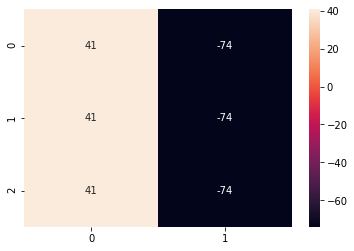

In [53]:
import seaborn as sns
import pandas as pd
# labels = df_140430_2.columns
# sns.heatmap(pd.DataFrame(cluster_centers, columns=labels),  annot=True)


sns.heatmap(pd.DataFrame(cluster_centers),  annot=True)

In [54]:
cluster_centers

array([[ 40.76508039, -73.97091929],
       [ 40.66957949, -73.7803368 ],
       [ 40.72488512, -73.99647892]])

#### Let's try to find best K value using ELBOW method

In [55]:
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 72502.00000000089
WCSS for K=2 --> 51717.83625719308
WCSS for K=3 --> 34216.22622298287
WCSS for K=4 --> 27924.122036997163
WCSS for K=5 --> 23098.005232051055
WCSS for K=6 --> 18452.751302542016
WCSS for K=7 --> 14877.050150902738
WCSS for K=8 --> 12435.596073651832
WCSS for K=9 --> 10946.084684628877
WCSS for K=10 --> 9578.924354070166


#### Let's try now using SILHOUTETTE method

In [56]:


# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.7405495432775854
Silhouette score for K=3 is 0.44665542443383177
Silhouette score for K=4 is 0.4652501875661078
Silhouette score for K=5 is 0.47421789732402464
Silhouette score for K=6 is 0.4842475507279575
Silhouette score for K=7 is 0.4875946397370068
Silhouette score for K=8 is 0.4348974825085442
Silhouette score for K=9 is 0.40660036494532387
Silhouette score for K=10 is 0.4100819484324541


## Kmeans method doesn't work !

## DBscan : let's have a try !  !

In [57]:
!pip install plotly

In [59]:
# import DBSCAN from sklearn and numpy
from sklearn.cluster import DBSCAN
import numpy as np

EPS=0.2
MIN_SAMPLES=100

# Instanciate DBSCAN 
db = DBSCAN(
    eps=EPS, 
    min_samples=MIN_SAMPLES, 
    metric="manhattan", 
    algorithm="brute"
)

db.fit(X)

nb_clusters = len(np.unique(db.labels_))


TITLE =("v1 - eps={} - min_samples={} - {} clusters created".format(EPS,MIN_SAMPLES,nb_clusters))

# Visualize with plotly 
## Import go to build our own figure

import plotly.graph_objects as go

fig = go.Figure()
fig.update_layout(title=TITLE)
    
# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = X[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show(renderer = "iframe_connected")

In [63]:
df_140430_2["cluster"] = db.labels_

fig = px.scatter_mapbox(
        df_140430_2[df_140430_2.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron",
    zoom=9,
    width=2000,
    height=500
)

fig.show()



In [65]:
EPS2=0.2
MIN_SAMPLES2=25

db2 = DBSCAN(
    eps=EPS2, 
    min_samples=MIN_SAMPLES2, 
    metric="manhattan", 
    algorithm="brute"
)


db2.fit(X)
print("done !")

TITLE =("v2 - eps={} - min_samples={} - {} clusters created".format(EPS2,MIN_SAMPLES2,nb_clusters))




done !


In [66]:
fig2 = go.Figure()
fig2.update_layout(title=TITLE)

# Loop through each label for our cluster
for i in np.unique(db2.labels_):
    label2 = X[db2.labels_ == i]
    fig2.add_trace(go.Scatter(x=label2[:, 0], y=label2[:, 1], mode="markers", name="Cluster {}".format(i)))

fig2.show(renderer = "iframe")

In [67]:
df_140430_2["cluster_v2"] = db2.labels_

fig = px.scatter_mapbox(
        df_140430_2[df_140430_2.cluster_v2 != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster_v2",
        mapbox_style="carto-positron",
        zoom=8,
        width=2000,
        height=500
)

fig.show()

In [68]:
EPS3=0.1
MIN_SAMPLES3=100

db3 = DBSCAN(
    eps=EPS3, 
    min_samples=MIN_SAMPLES3, 
    metric="manhattan", 
    algorithm="brute"
)
db3.fit(X)
print("done !")

TITLE =("v3 - eps={} - min_samples={} - {} clusters created".format(EPS3,MIN_SAMPLES3,nb_clusters))

done !


In [69]:
fig3 = go.Figure()
fig3.update_layout(title=TITLE)

# Loop through each label for our cluster
for i in np.unique(db3.labels_):
    label3 = X[db3.labels_ == i]
    fig3.add_trace(go.Scatter(x=label3[:, 0], y=label3[:, 1], mode="markers", name="Cluster {}".format(i)))

fig3.show(renderer = "iframe")
print('fig3 done !')

df_140430_2["cluster_v3"] = db3.labels_



fig3 done !


In [70]:
type( db3.labels_)

numpy.ndarray

In [73]:
fig3_map = px.scatter_mapbox(
        df_140430_2[df_140430_2.cluster_v3 != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster_v3",
        mapbox_style="carto-positron",
        zoom = 8,
        width=2000,
        height=500
)

fig3_map.show()

In [74]:
EPS4=0.1
MIN_SAMPLES4 = 4

db4 = DBSCAN(
    eps=EPS4, 
    min_samples=MIN_SAMPLES4, 
    metric="manhattan", 
    algorithm="brute"
)
db4.fit(X)
print("done !")

TITLE =("v4 - eps={} - min_samples={} - {} clusters created".format(EPS4,MIN_SAMPLES4,nb_clusters))

fig4 = go.Figure()
fig4.update_layout(title=TITLE)

# Loop through each label for our cluster
for i in np.unique(db4.labels_):
    label4 = X[db4.labels_ == i]
    fig4.add_trace(
        go.Scatter(x=label4[:, 0], y=label4[:, 1], mode="markers", name="Cluster {}".format(i)))

fig4.show(renderer = "iframe")

done !


In [76]:
df_140430_2["cluster_v4"] = db4.labels_

fig4_map = px.scatter_mapbox(
        df_140430_2[df_140430_2.cluster_v4 != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster_v4",
        mapbox_style="carto-positron",
        zoom = 10,
        width=2000,
        height=700
)

fig4_map.show()